# Etude de classifieurs

Les classifieurs étudiés ici sont disponibles dans Scikit-Learn, la librairie python de Machine-Learning développée par l'INRIA.
Les classifieurs étudiés ici sont :
- régression logistique
- K plus proches voisins (KPPV ou KNN)
- arbres de décision
- Adaboost (Adaptative Boosting)
- SVM (Suport Vector Machine)
- MLP (Multi-Layer Perceptron)

Chaque classifieur est utilisé avec des jeux de données "jouet" (Iris, Digit...) et des jeux de données plus réalistes (MNIST, GTSRB...).

## Régression

Il existe deux grands types de régression : 
- régression linéaire pour l'estimation de grandeurs continue
- régression logistique pour la classification

On s'intéresse ici donc plus à la régression logistique, mais en passant par un exemple "jouet" de régression linéaire pour bien faire la distinction entre les 2 types.

### Régression linaire

#### Régression linéaire mono-variée

Comme son nom l'indique, la régression linéaire mon-variée concerne une unique variable d'entrée.
Dans l'exemple suivant, on charge les données à partir d'un fichier de données ("student_scores.csv"), à l'aide d'une fonction Pandas.

(Source : https://stackabuse.com/linear-regression-in-python-with-scikit-learn/)

In [21]:
!wget https://raw.githubusercontent.com/encodedANAND/K-Fold-Cross-Validation/master/advertising.csv

--2022-10-20 08:53:43--  https://raw.githubusercontent.com/encodedANAND/K-Fold-Cross-Validation/master/advertising.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2022-10-20 08:53:43 ERROR 404: Not Found.



In [22]:
import pandas as pd

dataset = pd.read_csv('student_scores.csv')
print(dataset.shape)
print(dataset.head())    #affichage du début du fichier
dataset.describe()       #fonction pandas d'affichage de statistiques du dataset

(25, 2)
   Hours  Scores
0    2.5      21
1    5.1      47
2    3.2      27
3    8.5      75
4    3.5      30


,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


On peut représenter les données graphiquement. C'est facile puisqu'il n'y a qu'une seule variable. Les couples (entrée, sortie) sont donc en 2D. 

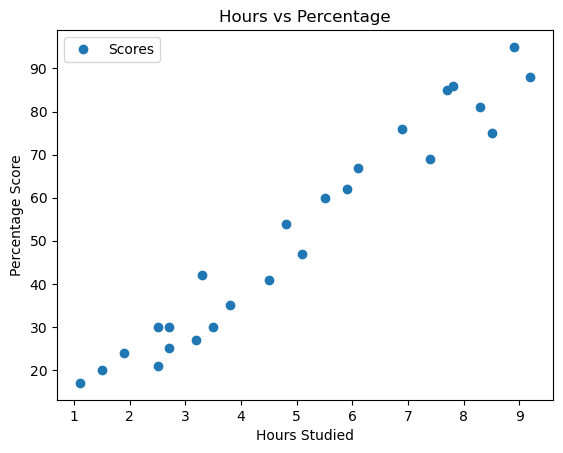

In [23]:
import matplotlib.pyplot as plt

#affichage graphique
dataset.plot(x='Hours', y='Scores', style='o')
plt.title('Hours vs Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.show()

On applique maintenant la régression linéaire, qui revient ici à modéliser les données par une droite (donc à déterminer 2 paramètres : ordonnée à l'origine et pente).
Mais pour évaluer la qualité de cette modélisation, il faut garder à part quelques données non utilisées dans la modélisation.
On sépare notre jeu de données en 2 sous-ensembles ("train"/"test"). Puis on applique la régression aux données d'apprentissage uniquement.

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

#séparation des données en train/test, puis modélisation par régression linéaire
#  use iloc to get data for a specific row
X = dataset.iloc[:, :-1].values 
y = dataset.iloc[:, 1].values
# print(X)
# print("change lane")
# print(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

print(X_train)
print(y_train)
print(X_test)
print(y_test)

[[3.8]
 [1.9]
 [7.8]
 [6.9]
 [1.1]
 [5.1]
 [7.7]
 [3.3]
 [8.3]
 [9.2]
 [6.1]
 [3.5]
 [2.7]
 [5.5]
 [2.7]
 [8.5]
 [2.5]
 [4.8]
 [8.9]
 [4.5]]
[35 24 86 76 17 47 85 42 81 88 67 30 25 60 30 75 21 54 95 41]
[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]
[20 27 69 30 62]


Puis on crée le régresseur et on l'adapte aux données d'apprentissage.

In [25]:
regressor = LinearRegression()      #création du modèle
regressor.fit(X_train, y_train)     #adaptation du modèle ("apprentissage")

print(regressor.intercept_)         #ordonnée à l'origine de la droite
print(regressor.coef_)              #pente

2.018160041434683
[9.91065648]


Pour évaluer les performances du modèle, il reste à l'appliquer aux données de test.
On utilise pour cela la fonction "predict".

In [26]:
y_pred = regressor.predict(X_test)

print(y_pred)

[16.88414476 33.73226078 75.357018   26.79480124 60.49103328]


Reste à afficher les résultats. On peut utiliser la fonction "DataFrame" de Pandas, qui crée un tableau à 2 dimensions.

On peut également afficher quelques statistiques courantes d'évaluation de ces résultats de test : erreur au carré moyenne, erreur absolue moyenne, etc. 

Les erreurs sont calculées à partir des estimations données par le modèle de regression et les valeurs réelles, des scores des étudiant(e)s.

In [27]:
from sklearn import metrics
import numpy as np

df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

print(df)

print('Mean Squared Error:', round(metrics.mean_squared_error(y_test, y_pred), 2))    #arrondi à 2 décimales
print('Mean Absolute Error:', round(metrics.mean_absolute_error(y_test, y_pred), 2))
print('Root Mean Squared Error:', round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)), 2))

   Actual  Predicted
0      20  16.884145
1      27  33.732261
2      69  75.357018
3      30  26.794801
4      62  60.491033
Mean Squared Error: 21.6
Mean Absolute Error: 4.18
Root Mean Squared Error: 4.65


On peut alors superposer le modèle (= la droite) aux points correspondants aux données, dans l'affichage graphique.

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


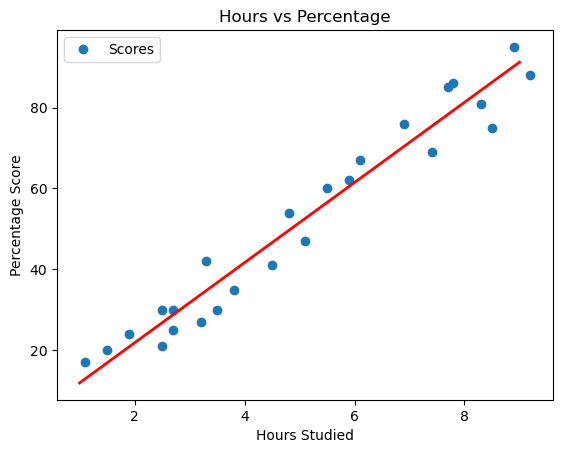

In [28]:
print(X_test)
dataset.plot(x='Hours', y='Scores', style='o')
plt.title('Hours vs Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')

a = regressor.coef_[0]     #pente
b = regressor.intercept_   #ordonnée à l'origine
x1, y1 = 1, a*1+b
x2, y2 = 9, a*9+b

X = [x1, x2]
Y = [y1, y2]

plt.plot(X, Y, '-r', linewidth=2)
plt.show()

On constate que l'estimation est correcte.

#### Régression linéaire multiple (ou multi-variée)

Dans la régression linéaire multiple, on cherche à estimer une variable à partir de plusieurs autres.
Par exemple le dataset "petrol_consumption.csv", contient la consommation de gaz de plusieurs états américains, en fonction de différents facteurs (taxes sur le pétrole, revenu par habitant, etc).
Le programme permettant d'appliquer la régression linéaire à ces données est le même que le précédent. Par contre, les résultats ne peuvent pas être visualisés graphiquement.  

(Source : https://stackabuse.com/linear-regression-in-python-with-scikit-learn/)

In [29]:
!wget https://raw.githubusercontent.com/anjan111/Machine-Learning/master/petrol_consumption.csv

--2022-10-20 08:54:00--  https://raw.githubusercontent.com/anjan111/Machine-Learning/master/petrol_consumption.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1389 (1.4K) [text/plain]
Saving to: ‘petrol_consumption.csv.2’

petrol_consumption. 100%[===================>]   1.36K  --.-KB/s    in 0s      

2022-10-20 08:54:00 (9.85 MB/s) - ‘petrol_consumption.csv.2’ saved [1389/1389]



On peut lui appliquer les différentes étapes vues dans l'exemple précédent.

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

dataset = pd.read_csv('petrol_consumption.csv')
print("début du fichier : ")
print(dataset.head())
print("\ndescription :")
print(dataset.describe())

X = dataset[['Petrol_tax', 'Average_income', 'Paved_Highways', 'Population_Driver_licence(%)']]
y = dataset['Petrol_Consumption']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
regressor = LinearRegression()
regressor.fit(X_train, y_train)

coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])
print("\nparametres obtenus :")
print(coeff_df)

y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print("\nrésultats avec échantillon de test :")
print(df)

print('Root Mean Squared Error:', round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)), 2))

début du fichier : 
   Petrol_tax  Average_income  Paved_Highways  Population_Driver_licence(%)  \
0         9.0            3571            1976                         0.525   
1         9.0            4092            1250                         0.572   
2         9.0            3865            1586                         0.580   
3         7.5            4870            2351                         0.529   
4         8.0            4399             431                         0.544   

   Petrol_Consumption  
0                 541  
1                 524  
2                 561  
3                 414  
4                 410  

description :
       Petrol_tax  Average_income  Paved_Highways  \
count   48.000000       48.000000       48.000000   
mean     7.668333     4241.833333     5565.416667   
std      0.950770      573.623768     3491.507166   
min      5.000000     3063.000000      431.000000   
25%      7.000000     3739.000000     3110.250000   
50%      7.500000     4298.0

### Régression Logistique

Pour rappel, dans le cas mono-varié, la régression logistique cherche à modéliser un problème de classification par une courbe de type "logistique" (courbe en "S", ou sigmoïde).

##### Application aux données "Student Scores"

On peut commencer par l'appliquer au dataset auquel on a déjà appliqué la régression linéaire ("Student Scores").
Pour que ça fonctionne, il faut transformer les notes des étudiants en classes binaires : "matière validée" / "non validée".
On va considérer que la validation correspond à une note >=10.
Les seules différences par rapport à la version linéaire de la régression sont :
- les valeurs de sorties doivent être des classes binaires (classe positive / classe négative).
- le modèle à afficher est une sigmoïde
- puisque la régression logistique est une classification, on peut afficher le taux de classification correcte ("accuracy") et la matrice de confusion

In [31]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import *
import matplotlib.pyplot as plt
from scipy.special import expit

dataset = pd.read_csv('student_scores.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 1].values
print(y)
#conversion des valeurs de sortie en classes
for i in range(y.size):
    if y[i] >= 50:       #les sorties sont données en pourcentage du score max
        y[i] = 1
    else:
        y[i] = 0
print(y)
#rm : l'opération précédente peut être faite de façon plus compacte 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)
print("X_train : ")
print(X_train)
print("X_test : ")
print(X_test)
print("y_train : ")
print(y_train)
print("y_test : ")
print(y_test)

regressor = LogisticRegression()    #création du modèle

print("apprentissage...")
regressor.fit(X_train, y_train)     #adaptation du modèle ("apprentissage")
print("ok")

y_pred = regressor.predict(X_test)
print("Sorties prédites : ")
print(y_pred)
probs_y = regressor.predict_proba(X_test)  # Predict probabilities
probs_y = np.round(probs_y, 2)            #arrondir à 2 décimales
print("Probabilités d'appartenance aux classes pour chaque donnée de test :")
print(probs_y)

score = regressor.score(X_test, y_test)
print("score (précision, taux de classification correcte): ")
print(round(score, 2))                          #arrondi à 2 chiffres après la virgule

#matrice de confusion
cm = confusion_matrix(y_test, y_pred)
print("\nmatrice de confusion :")
print(cm)


[21 47 27 75 30 20 88 60 81 25 85 62 41 42 17 95 30 24 67 69 30 54 35 76
 86]
[0 0 0 1 0 0 1 1 1 0 1 1 0 0 0 1 0 0 1 1 0 1 0 1 1]
X_train : 
[[8.3]
 [9.2]
 [6.1]
 [3.5]
 [2.7]
 [5.5]
 [2.7]
 [8.5]
 [2.5]
 [4.8]
 [8.9]
 [4.5]]
X_test : 
[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]
 [3.8]
 [1.9]
 [7.8]
 [6.9]
 [1.1]
 [5.1]
 [7.7]
 [3.3]]
y_train : 
[1 1 1 0 0 1 0 1 0 1 1 0]
y_test : 
[0 0 1 0 1 0 0 1 1 0 0 1 0]
apprentissage...
ok
Sorties prédites : 
[0 0 1 0 1 0 0 1 1 0 1 1 0]
Probabilités d'appartenance aux classes pour chaque donnée de test :
[[0.98 0.02]
 [0.86 0.14]
 [0.03 0.97]
 [0.94 0.06]
 [0.17 0.83]
 [0.75 0.25]
 [0.97 0.03]
 [0.02 0.98]
 [0.05 0.95]
 [0.99 0.01]
 [0.36 0.64]
 [0.02 0.98]
 [0.85 0.15]]
score (précision, taux de classification correcte): 
0.92

matrice de confusion :
[[7 1]
 [0 5]]


La même chose en graphique...

1.1.2


/opt/conda/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


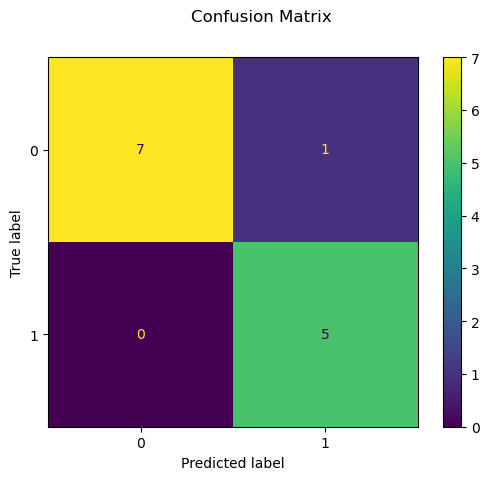

In [32]:
import sklearn
print(sklearn.__version__)

#la même matrice de confusion mais en graphique
from sklearn.metrics import plot_confusion_matrix

disp = metrics.plot_confusion_matrix(regressor, X_test, y_test)
disp.figure_.suptitle("Confusion Matrix")
plt.show()

Affichage graphique des données et du modèle :

[ 0.          0.20408163  0.40816327  0.6122449   0.81632653  1.02040816
  1.2244898   1.42857143  1.63265306  1.83673469  2.04081633  2.24489796
  2.44897959  2.65306122  2.85714286  3.06122449  3.26530612  3.46938776
  3.67346939  3.87755102  4.08163265  4.28571429  4.48979592  4.69387755
  4.89795918  5.10204082  5.30612245  5.51020408  5.71428571  5.91836735
  6.12244898  6.32653061  6.53061224  6.73469388  6.93877551  7.14285714
  7.34693878  7.55102041  7.75510204  7.95918367  8.16326531  8.36734694
  8.57142857  8.7755102   8.97959184  9.18367347  9.3877551   9.59183673
  9.79591837 10.        ]
[0.00261549 0.00339391 0.00440296 0.00571031 0.00740295 0.00959248
 0.01242149 0.01607129 0.02077095 0.02680748 0.0345365  0.04439225
 0.05689483 0.0726509  0.09234313 0.11670128 0.14644791 0.18221269
 0.22441536 0.2731281  0.3279437  0.38788981 0.45143315 0.51660072
 0.58120851 0.64314613 0.70064155 0.75243918 0.79786007 0.83675541
 0.86939174 0.89631184 0.91820538 0.93580722 0.9498282 

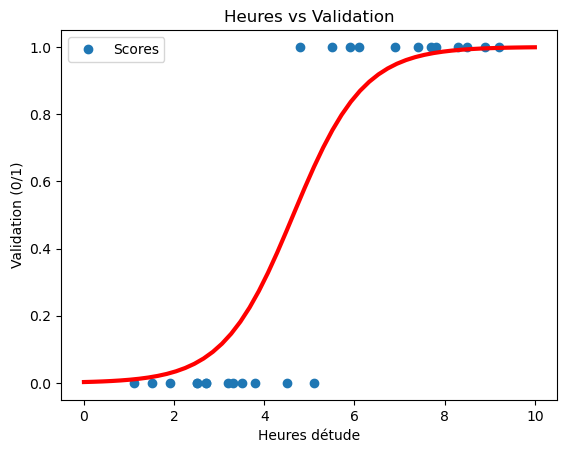

In [33]:
#affichage graphique : le modèle à afficher est une sigmoïde dont le point d'inflexion est centré sur "intercept_" et la pente au point d'inflexion "coef_"
dataset.plot(x='Hours', y='Scores', style='o')
x_plot = np.linspace(0, 10, 50)   #on se definit un tableau de 50 abscisses de 0 à 10 pour la courbe
loss = expit(x_plot * regressor.coef_ + regressor.intercept_).ravel()
print(x_plot)
print(loss)
plt.plot(x_plot, loss, color='red', linewidth=3)
plt.title('Heures vs Validation')
plt.xlabel('Heures d''étude')
plt.ylabel('Validation (0/1)')
plt.show()

### Régression Logistique avec données Iris

La différence par rapport à l'exemple précédent est au niveau des tableaux de données.

In [34]:
from sklearn import datasets
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

iris = load_iris()
X = iris.data[:, :4]         #elements caracteristiques (features)
y = iris.target             #labels (classe reelle)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)
# Predict probabilities
probs_y = classifier.predict_proba(X_test)

probs_y = np.round(probs_y, 2)            #arrondir à 2 décimales
print("Probabilités d'appartenance aux 3 classes pour chaque donnée de test :")
print(probs_y)

#matrice de confusion
cm = confusion_matrix(y_test, y_pred)
print("\nmatrice de confusion :")
print(cm)

score = classifier.score(X_test, y_test)
print("score (précision, taux de classification correcte): ")
print(round(score, 2))                          #arrondi à 2 chiffres après la virgule


Probabilités d'appartenance aux 3 classes pour chaque donnée de test :
[[0.   0.06 0.94]
 [0.01 0.96 0.03]
 [0.98 0.02 0.  ]
 [0.   0.02 0.98]
 [0.97 0.03 0.  ]
 [0.   0.01 0.99]
 [0.98 0.02 0.  ]
 [0.   0.75 0.25]
 [0.   0.74 0.26]
 [0.02 0.94 0.04]
 [0.   0.16 0.84]
 [0.01 0.81 0.18]
 [0.   0.79 0.2 ]
 [0.   0.76 0.24]
 [0.   0.71 0.29]
 [0.98 0.02 0.  ]
 [0.01 0.76 0.24]
 [0.01 0.85 0.14]
 [0.97 0.03 0.  ]
 [0.98 0.02 0.  ]
 [0.   0.19 0.81]
 [0.01 0.71 0.28]
 [0.94 0.06 0.  ]
 [0.98 0.02 0.  ]
 [0.   0.43 0.57]
 [0.99 0.01 0.  ]
 [0.95 0.05 0.  ]
 [0.01 0.9  0.09]
 [0.14 0.85 0.01]
 [0.96 0.04 0.  ]
 [0.   0.12 0.88]
 [0.01 0.68 0.3 ]
 [0.97 0.03 0.  ]
 [0.   0.36 0.64]
 [0.   0.03 0.97]
 [0.05 0.88 0.07]
 [0.94 0.06 0.  ]
 [0.   0.31 0.69]]

matrice de confusion :
[[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]
score (précision, taux de classification correcte): 
0.97


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Onn peut constater que la précision sur les données de test est très bonne, mais le résultat n'est pas très significatif car les données Iris ne contituent pas un dataset complexe, de plus le jeu de test est très réduit.

On peut également calculer la matrice de confusion.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


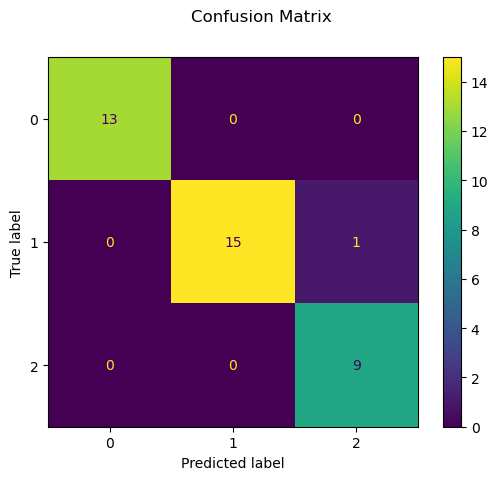

In [35]:
disp = metrics.plot_confusion_matrix(classifier, X_test, y_test)
disp.figure_.suptitle("Confusion Matrix")

plt.show()

###  Régression logistique avec données Digits (exercice 2.1)

On applique la regression logistique aux données Digit.

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


score (précision, taux de classification correcte) : 
0.96


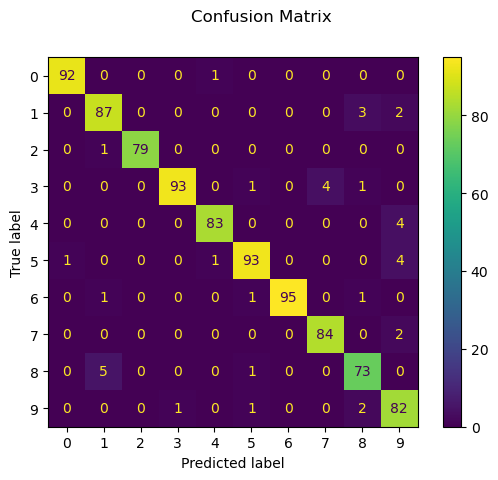

In [36]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.datasets import make_blobs
from pandas import DataFrame

digits = datasets.load_digits()

X = digits.data
y = digits.target
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.5, random_state=2)

model = LogisticRegression()
model.fit(trainX, trainy)
probs = model.predict_proba(testX)
probs = probs[:, 1]

score = model.score(testX, testy)
print("score (précision, taux de classification correcte) : ")
print(round(score, 2))       

disp = metrics.plot_confusion_matrix(model, testX, testy)
disp.figure_.suptitle("Confusion Matrix")
plt.show()


La précision obtenue est de 96%.

Classes les plus confondues : 8 <-> 1, 3 <-> 7, 4 <-> 9 et 5 <-> 9 (resp. classe réelle <-> classe estimée) 

## Les K plus proches voisins (kPPV, ou KNN)

### KPPV avec données Iris

La méthode des KPPV ne comporte pas de phase d'apprentissage.
Avec ce classifieur la fonction fit() (qui est la fonction d'apprentissage) se limite à répertorier les k plus proches voisins des données d'apprentissage. Ces exemples servent à démarrer l'algorithme, car il faut des exemples dont on connaît déjà la classe, pour pouvoir classifier les autres. 

In [43]:
from sklearn import datasets
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

iris = load_iris()
X = iris.data               #elements caracteristiques (features)
y = iris.target             #labels (classe reelle)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 0)

classifier = KNeighborsClassifier(n_neighbors = 10)

classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)      #prédiction (classes estimées)
#print(y_pred)
#print(X_test)
probs_y = classifier.predict_proba(X_test)   #probabilités pour chaque classe

print("Probabilités d'appartenance aux 3 classes pour chaque donnée de test :")
print(np.round(probs_y, 2))     #arrondir à 2 décimales

#matrice de confusion
cm = confusion_matrix(y_test, y_pred)
print("\nmatrice de confusion :")
print(cm)

score = classifier.score(X_test, y_test)
print("score (précision, taux de classification correcte): ")
print(round(score, 3))                          #arrondi à 3 chiffres après la virgule


Probabilités d'appartenance aux 3 classes pour chaque donnée de test :
[[0.  0.1 0.9]
 [0.  1.  0. ]
 [1.  0.  0. ]
 [0.  0.  1. ]
 [1.  0.  0. ]
 [0.  0.  1. ]
 [1.  0.  0. ]
 [0.  0.8 0.2]
 [0.  0.9 0.1]
 [0.  1.  0. ]
 [0.  0.2 0.8]
 [0.  0.9 0.1]
 [0.  0.9 0.1]
 [0.  0.9 0.1]
 [0.  0.8 0.2]
 [1.  0.  0. ]
 [0.  0.9 0.1]
 [0.  1.  0. ]
 [1.  0.  0. ]
 [1.  0.  0. ]
 [0.  0.4 0.6]
 [0.  0.9 0.1]
 [1.  0.  0. ]
 [1.  0.  0. ]
 [0.  0.4 0.6]
 [1.  0.  0. ]
 [1.  0.  0. ]
 [0.  1.  0. ]
 [0.  1.  0. ]
 [1.  0.  0. ]
 [0.  0.1 0.9]
 [0.  0.9 0.1]
 [1.  0.  0. ]
 [0.  0.4 0.6]
 [0.  0.  1. ]
 [0.  1.  0. ]
 [1.  0.  0. ]
 [0.  0.3 0.7]
 [0.  1.  0. ]
 [0.  1.  0. ]
 [0.  0.  1. ]
 [1.  0.  0. ]
 [0.  0.1 0.9]
 [1.  0.  0. ]
 [1.  0.  0. ]
 [0.  1.  0. ]
 [0.  0.1 0.9]
 [0.  0.  1. ]
 [0.  0.4 0.6]
 [0.  0.  1. ]
 [0.  1.  0. ]
 [0.  0.  1. ]
 [0.  0.8 0.2]
 [0.  1.  0. ]
 [0.  0.4 0.6]
 [0.  0.4 0.6]
 [0.  0.8 0.2]
 [0.  0.3 0.7]
 [0.  0.8 0.2]
 [0.  0.1 0.9]]

matrice de confusion :
[[16

La précision obtenue pour k=10 voisins est de 96,7 %.

#### Recherche de la valeur optimale de k

On s'intéresse maintenant à rechercher quelle est la valeur optimale de k.
Pour cela, on crée un boucle dans laquelle on fait varier k et on applique le classifieur aux données pour chaque valeur. Puis on réalise un affichage graphique de la précision en fonction de k.

[0.9333333333333333, 0.9166666666666666, 0.95, 0.9666666666666667, 0.9833333333333333, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.95, 0.9666666666666667, 0.95, 0.95, 0.9333333333333333]
Confusion Matrix:
[[20  0  0]
 [ 0 20  1]
 [ 0  3 16]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       0.87      0.95      0.91        21
           2       0.94      0.84      0.89        19

    accuracy                           0.93        60
   macro avg       0.94      0.93      0.93        60
weighted avg       0.94      0.93      0.93        60



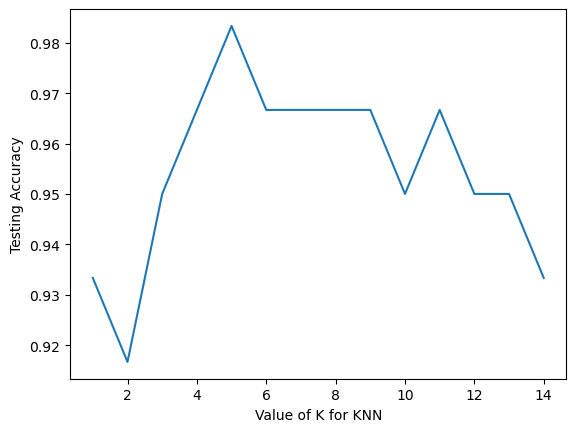

In [45]:
from sklearn import datasets
from sklearn import metrics
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler

iris = load_iris()

X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=5)

#Normalisation des données (facultatif), pour que chaque élément caractéristique
#ait une moyenne nulle et un écart-type égal à 1, sur l'ensemble des données
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

scores = []
k_range = range(1, 15)
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    score = metrics.accuracy_score(y_test, y_pred)
    scores.append(score)
print(scores)

result = metrics.confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)
result1 = metrics.classification_report(y_test, y_pred)
print("Classification Report:",)
print(result1)

plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')
plt.show()


Les résultats dépendent de :
- la normalisation des données, activée ou non
- la quantité de données utilisées pour l'apprentissage
- le paramètres aléatoire de la fonction train_test_split(), qui permet de modifier le choix des exemples tirés au hasard

### KPPV  avec Digits 

On peut faire la la même chose que ci-dessus pour les données Digit.
On choisit de prendre 20% des données pour le test.

(1437, 64)
(360, 64)
[0.9861111111111112, 0.9861111111111112, 0.9861111111111112, 0.9833333333333333, 0.9805555555555555, 0.9805555555555555, 0.9805555555555555, 0.9777777777777777, 0.9722222222222222]


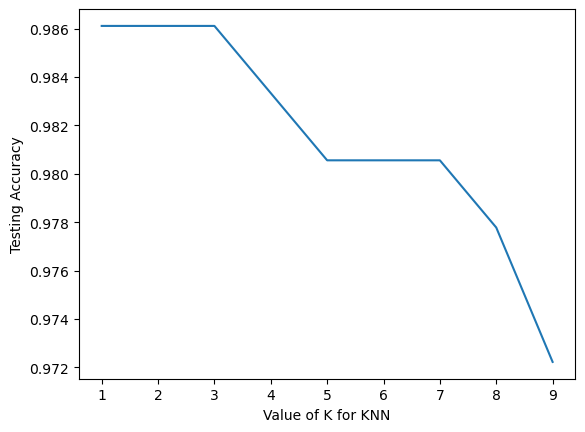

In [46]:
from sklearn.model_selection import train_test_split
from matplotlib import pyplot

digits = datasets.load_digits()

X = digits.data
y = digits.target
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.2, random_state=2)

print(trainX.shape)
print(testX.shape)

k_range = range(1, 10)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(trainX, trainy)
    y_pred = knn.predict(testX)
    score = metrics.accuracy_score(testy, y_pred)
    scores.append(score)
print(scores)

plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')
plt.show()

On constate que la meilleur précision est obtenue pour k=1 à 3 (ce qui peut varier d'un dataset à l'autre).

### KPPV avec MNIST

On peut utiliser des versions CSV des bases d'apprentissage et de test (pour voir une autre façon de faire).

Avec les données MNIST, on ne peut pas se pemettre d'utiliser tous les exemples de la base d'apprentissage, car le traitement de classification serait beaucoup trop long. 
Dans l'exemple qui suit, on en prend que 1000 sur les 60000 (soit en moyenne 100 pour chacune des 10 classes).

Rm : avec des données volumineuses (notion relative, mais on peut considérer que MNIST avec ses 60000 + 10000 images l'est), le traitement peut être long. Il est alors utile d'afficher les temps de traitement (fit() + predict())

Loading dataset...
ok
(59999, 784)
(59999,)
(9999, 784)
(9999,)
k= 1
adaptation classifieur, patience...
durée adaptation classifieur : 0.01s.
calcul précision, patience...
durée prédiction :  2.4s.
précision : 86.9%
k= 2
adaptation classifieur, patience...
durée adaptation classifieur : 0.01s.
calcul précision, patience...
durée prédiction :  2.6s.
précision : 85.0%
k= 3
adaptation classifieur, patience...
durée adaptation classifieur : 0.02s.
calcul précision, patience...
durée prédiction :  2.6s.
précision : 86.2%
k= 4
adaptation classifieur, patience...
durée adaptation classifieur : 0.01s.
calcul précision, patience...
durée prédiction :  2.6s.
précision : 86.3%
k= 5
adaptation classifieur, patience...
durée adaptation classifieur : 0.01s.
calcul précision, patience...
durée prédiction :  2.6s.
précision : 85.8%
k= 6
adaptation classifieur, patience...
durée adaptation classifieur : 0.01s.
calcul précision, patience...
durée prédiction :  2.8s.
précision : 85.7%
k= 7
adaptation cl

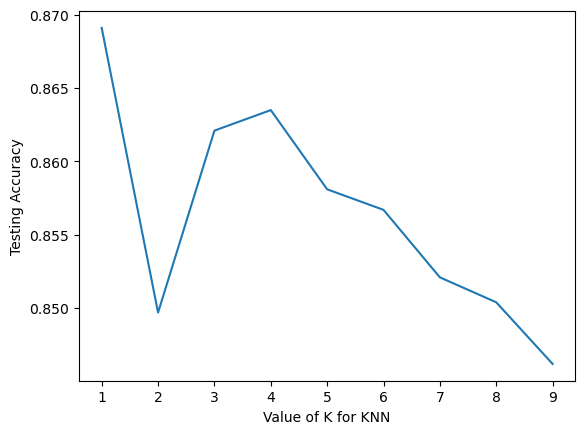

In [47]:
from sklearn import datasets
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import time

print("Loading dataset...")
train = pd.read_csv('data/MNIST/mnist_train.csv')
test = pd.read_csv('data/MNIST/mnist_test.csv')
print("ok")

trainX = train.values[:, 1:]
trainy = train.values[:, 0]
testX = test.values[:, 1:]
testy = test.values[:, 0]

print(trainX.shape)
print(trainy.shape)
print(testX.shape)
print(testy.shape)

k_range = range(1, 10)
scores = []
for k in k_range:
    print("k=", k)
    knn = KNeighborsClassifier(n_neighbors = k)
    print("adaptation classifieur, patience...")
    t0 = time.time()
    knn.fit(trainX[0:1000], trainy[0:1000])
    print("durée adaptation classifieur : {:.2f}s." .format(time.time()-t0))
    print("calcul précision, patience...")
    t0 = time.time()
    y_pred = knn.predict(testX)
    print("durée prédiction :  {:.1f}s." .format(time.time()-t0))
    score = metrics.accuracy_score(testy, y_pred)
    scores.append(score)
    print('précision : {:.1f}%' .format(score*100))
print(scores)

plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')
plt.show()

Là encore la meilleure précision est obtenue pour k=1.
On constate que le temps de traitement du fit() est très court. Par contre celui du classement des 10000 images de test est beaucoup plus long (16 à 21 s. sur CPU pour ce test).  
On constate également que le temps n'augmente pas de façon sensible avec l'augmentation de la valeur de k (ce à quoi on aurait pu s'attendre).

### Amélioration des résultats (Exercice 2.2)

Dans le programme suivant, on cherche à obtenir au moins 90% de précision, quitte à augmenter un peu le temps de traitement.

k= 1
adaptation classifieur, patience...
durée adaptation classifieur : 0.10s.
calcul précision, patience...
durée prédiction :  11.9s.
précision : 94.6%
k= 2
adaptation classifieur, patience...
durée adaptation classifieur : 0.08s.
calcul précision, patience...
durée prédiction :  13.1s.
précision : 93.3%
k= 3
adaptation classifieur, patience...
durée adaptation classifieur : 0.11s.
calcul précision, patience...
durée prédiction :  13.9s.
précision : 94.6%
k= 4
adaptation classifieur, patience...
durée adaptation classifieur : 0.08s.
calcul précision, patience...
durée prédiction :  14.0s.
précision : 94.4%
k= 5
adaptation classifieur, patience...
durée adaptation classifieur : 0.09s.
calcul précision, patience...
durée prédiction :  13.6s.
précision : 94.4%
k= 6
adaptation classifieur, patience...
durée adaptation classifieur : 0.08s.
calcul précision, patience...
durée prédiction :  12.4s.
précision : 94.4%
k= 7
adaptation classifieur, patience...
durée adaptation classifieur : 0.08

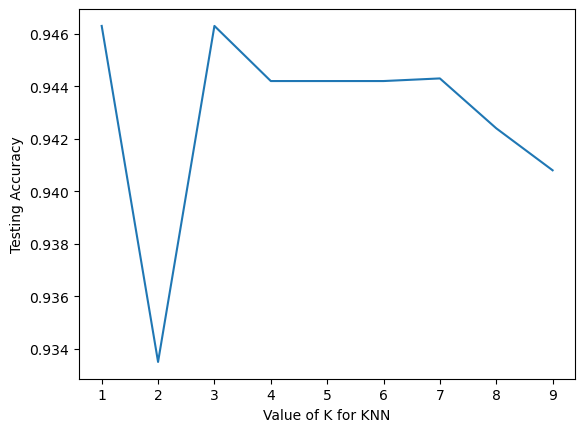

In [48]:
k_range = range(1, 10)
scores = []
for k in k_range:
    print("k=", k)
    knn = KNeighborsClassifier(n_neighbors = k)
    print("adaptation classifieur, patience...")
    t0 = time.time()
    knn.fit(trainX[0:10000], trainy[0:10000])
    print("durée adaptation classifieur : {:.2f}s." .format(time.time()-t0))
    print("calcul précision, patience...")
    t0 = time.time()
    y_pred = knn.predict(testX)
    print("durée prédiction :  {:.1f}s." .format(time.time()-t0))
    score = metrics.accuracy_score(testy, y_pred)
    scores.append(score)
    print('précision : {:.1f}%' .format(score*100))
print(scores)

plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')
plt.show()

On constate qu'avec ..... on a pu améliorer la précision, puisqu'on obtient une valeur de  ... pour k=...


## Arbres de décision (Decision Trees)

### Arbres de décision avec Iris

In [ ]:
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

iris = datasets.load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% training and 30% test

DTC = DecisionTreeClassifier()                   #creation du classifieur
model = DTC.fit(X_train, y_train)                #apprentissage

y_pred = model.predict(X_test)                   #prediction des classes pour les donnees de test

accuracy = accuracy_score(y_test, y_pred)        #calcul precision
print("Accuracy:", round(accuracy, 2))
print("Accuracy:", model.score)

On peut alors visualiser l'arbre généré par la méthode.

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Prepare a plot figure with set size.
plt.figure(figsize = (15,15))
# Plot the decision tree, showing the decisive values and the improvements in Gini impurity along the way.
plot_tree(model, filled=True)
# Display the tree plot figure.
plt.show()

Il peut être intéressant de visualiser les séparations des classes.
Mais on ne peut le faire qu'en sélectionnant des paires de variables.
On utilisera par exemple les caractéritiques "petal length" et "petal width".
Commençons par afficher les exemples en 2D pour ces 2 variables.

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['species'] = iris.target
df['species_names'] = df.species
df.replace({'species_names':{
            0:iris['target_names'][0],
            1:iris['target_names'][1],
            2:iris['target_names'][2]            
        }}, inplace=True)
df.columns = [item.replace(' (cm)', '') for item in df.columns]
df.head()
plt.rcParams.update({'axes.labelsize': 'large'})
plt.rcParams.update({'axes.titlesize': 'large'})
g = sns.FacetGrid(df, hue='species_names', size=5)
g.map(plt.scatter, 'petal length', 'petal width', s=20)
g.add_legend()
g.fig.gca().set_title('Iris species')


On peut alors appliquer un arbre de décision aux données pour ces 2 variables d'entrée, avec quelques niveaux de profondeur différents : 1, 2 et 3, en visualisant à chaque fois le résultat. On génère également un arbre de décision sans spécifier la profondeur.

In [ ]:
import numpy as np
from matplotlib.colors import ListedColormap

plt.rcParams.update({'figure.titlesize': 'large'})
step = 0.04
from sklearn import tree
X = df[['petal length', 'petal width']]
y = df.species
    
def mesh_plot(x, y, species, ax, clf):
    values = species.unique()
    colors = sns.color_palette()[:len(values)]
    xx, yy = np.meshgrid(
        np.arange(x.min() - 0.1, x.max() + 0.1, step),
        np.arange(y.min() - 0.1, y.max() + 0.1, step))
    mesh_predict = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    mesh_predict = mesh_predict.reshape(xx.shape)
    for i in range(len(colors)):
        ax.scatter(x[df.species == values[i]], y[df.species == values[i]], color=colors[i])
        ax.set_xlim(x.min() - 0.2, x.max() + 0.2)
        ax.set_ylim(y.min() - 0.2, y.max() + 0.2)
    ax.pcolormesh(xx, yy, mesh_predict,
        cmap=ListedColormap(sns.color_palette()[:3]), alpha=0.2)
    ax.set_title('depth = {}'.format(clf.max_depth))

fig, ax = plt.subplots(1, 4, sharey=True, figsize=(15, 4), squeeze=True)
fig.tight_layout()
fig.suptitle('Decision trees with varying depths', y=1.05)

for idx in range(0, 3):
    clf = tree.DecisionTreeClassifier(max_depth=idx + 1, random_state=0).fit(X, df.species)
    model = clf.fit(X, df.species)
    mesh_plot(df['petal length'], df['petal width'], df.species, ax[idx], clf)
idx = idx + 1
clf = tree.DecisionTreeClassifier(random_state=0)
model = clf.fit(X, df.species)
mesh_plot(df['petal length'], df['petal width'], df.species, ax[idx], clf)

On constate que plus la profondeur de l'arbre est grande, plus la forme de la séparation est complexe.

On peut afficher les arbres correspondants...

In [ ]:
clf = tree.DecisionTreeClassifier(max_depth=1, random_state=0)
X = df[['petal length', 'petal width', 'sepal length', 'sepal width']]
model = clf.fit(X, df.species)
plot_tree(model)

In [ ]:
clf = tree.DecisionTreeClassifier(max_depth=2, random_state=0)
model = clf.fit(X, df.species)
plot_tree(model)

In [ ]:
clf = tree.DecisionTreeClassifier(max_depth=3, random_state=0)
model = clf.fit(X, df.species)
plot_tree(model)

On peut relancer le classifieur sans lui indiquer de profondeur maximale, ce qui lui permet d'aller jusqu'au bout du processus de séparation.

In [ ]:
fig = plt.figure(figsize=(15, 10))
fig.tight_layout()
clf = tree.DecisionTreeClassifier(random_state=0)
model = clf.fit(X, df.species)
plot_tree(model)

### Arbres de décision avec Digits

On reprend l'exemple précédent aux données Digit.
Il peut être intéressant de voir l'influence de certains paramètres de l'algorithme sur le résultat (on peut trouver la liste complète des paramètres sur le sit de Scikit-Learn, ici pour ce classifieur : https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html).
Notamment la profondeur de l'arbre, que l'on peut faire varier. Puis on représente les accuracies correspondantes graphiquement.
On peut également comparer les performances du classifieur obtenues avec les données d'apprentissage avec celles obtenues sur les données de test.


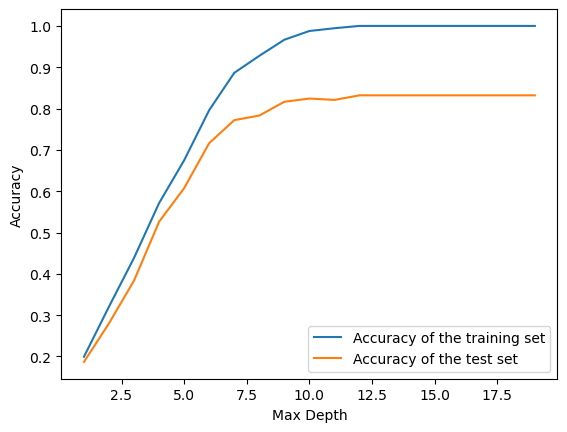

In [5]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier        #Decision Tree

digits = datasets.load_digits()

X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.5, random_state=2)

training_accuracies = []
test_accuracies = []

max_dep = range(1,20)

for md in max_dep:
    model = DecisionTreeClassifier(max_depth=md,random_state=0)
    model.fit(X_train,y_train)
    training_accuracy = model.score(X_train, y_train)
    test_accuracy = model.score(X_test, y_test)
    training_accuracies.append(training_accuracy)
    test_accuracies.append(test_accuracy)
 
plt.plot(max_dep, training_accuracies, label='Accuracy of the training set')
plt.plot(max_dep, test_accuracies, label='Accuracy of the test set')
plt.ylabel('Accuracy')
plt.xlabel('Max Depth')
plt.legend()

On constate un phénomène d'apprentissage par coeur ("overfitting"), puisque les données d'apprentissage sont bien classées à 100%.

Si on visualise l'arbre obtenu, évidemment il est beaucoup plus profond que celui obtenu pour Iris...

In [ ]:
from sklearn.tree import plot_tree

# Prepare a plot figure with set size.
plt.figure(figsize = (20,10))
# Plot the decision tree, showing the decisive values and the improvements in Gini impurity along the way.
plot_tree(model, filled=True)
# Display the tree plot figure.
plt.show()

### Arbres de décision avec MNIST

In [ ]:
from sklearn import datasets
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier        #Decision Tree
from sklearn import svm
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

print("Loading dataset...")
train = pd.read_csv('data/MNIST/mnist_train.csv')
test = pd.read_csv('data/MNIST/mnist_test.csv')
print("ok")

trainX = train.values[:60000, 1:]
trainy = train.values[:60000, 0]
testX = test.values[:10000, 1:]
testy = test.values[:10000, 0]
'''
trainX = train.values[:, 1:]
trainy = train.values[:, 0]
testX = test.values[:, 1:]
testy = test.values[:, 0]
'''
model = DecisionTreeClassifier()
print("adaptation classifieur...")
model.fit(trainX, trainy)

print(model.score(trainX, trainy))
print(model.score(testX, testy))

On peut afficher l'arbre correspondant, mais ça prend un peu de temps...

In [ ]:
from sklearn.tree import plot_tree

# Prepare a plot figure with set size.
plt.figure(figsize = (20,10))
# Plot the decision tree, showing the decisive values and the improvements in Gini impurity along the way.
print("affichage de l'arbre, un peu de patience...")
plot_tree(model, filled=True)
# Display the tree plot figure.
plt.show()

## Adaboost

Il est intéressant de commencer par un problème "jouet" en 2 dimensions, ce qui permet de visualiser les résultats du partitionnement de l'espace d'entrée, et de rattacher ce résultat avec celui de l'exemple du cours.

### Exemple jouet en dimension 2

Pour cet exemple en dimension 2, on peut utiliser une fonction d'affichage graphique, disponible ici : https://geoffruddock.com/adaboost-from-scratch-in-python/.  
Elle est recopée dans la cellule suivante :

In [ ]:
#récupéré sur https://geoffruddock.com/adaboost-from-scratch-in-python/
from typing import Optional
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

def plot_adaboost(X: np.ndarray,
                  y: np.ndarray,
                  clf=None,
                  sample_weights: Optional[np.ndarray] = None,
                  annotate: bool = False,
                  ax: Optional[mpl.axes.Axes] = None) -> None:
    """ Plot ± samples in 2D, optionally with decision boundary """

    assert set(y) == {-1, 1}, 'Expecting response labels to be ±1'

    if not ax:
        fig, ax = plt.subplots(figsize=(5, 5), dpi=100)
        fig.set_facecolor('white')

    pad = 1
    x_min, x_max = X[:, 0].min() - pad, X[:, 0].max() + pad
    y_min, y_max = X[:, 1].min() - pad, X[:, 1].max() + pad

    if sample_weights is not None:
        sizes = np.array(sample_weights) * X.shape[0] * 100
    else:
        sizes = np.ones(shape=X.shape[0]) * 100

    X_pos = X[y == 1]
    sizes_pos = sizes[y == 1]
    ax.scatter(*X_pos.T, s=sizes_pos, marker='+', color='red')

    X_neg = X[y == -1]
    sizes_neg = sizes[y == -1]
    ax.scatter(*X_neg.T, s=sizes_neg, marker='.', c='blue')

    if clf:
        plot_step = 0.01
        xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                             np.arange(y_min, y_max, plot_step))

        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        
        # If all predictions are positive class, adjust color map acordingly
        if list(np.unique(Z)) == [1]:
            fill_colors = ['r']
        else:
            fill_colors = ['b', 'r']

        ax.contourf(xx, yy, Z, colors=fill_colors, alpha=0.2)

    if annotate:
        for i, (x, y) in enumerate(X):
            offset = 0.05
            ax.annotate(f'$x_{i + 1}$', (x + offset, y - offset))

    ax.set_xlim(x_min+0.5, x_max-0.5)
    ax.set_ylim(y_min+0.5, y_max-0.5)
    ax.set_xlabel('$x_1$')
    ax.set_ylabel('$x_2$')

On génère d'abord un dataset-jouet (=tout petit dataset) :

In [ ]:
import numpy as np
from sklearn.datasets import make_gaussian_quantiles
from sklearn.model_selection import train_test_split

def make_toy_dataset(n: int = 100, random_seed: int = None):
    """ Generate a toy dataset for evaluating AdaBoost classifiers """
    
    n_per_class = int(n/2)
    
    if random_seed:
        np.random.seed(random_seed)

    X, y = make_gaussian_quantiles(n_samples=n, n_features=2, n_classes=2)
    
    return X, y*2-1

X, y = make_toy_dataset(n=10, random_seed=44)
plot_adaboost(X, y)

Puis on crée le classifieur et on lui applique ce dataset :

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

bench = AdaBoostClassifier(n_estimators=10, algorithm='SAMME').fit(X, y)
plot_adaboost(X, y, bench)

train_err = (bench.predict(X) != y).mean()
print(f'Train error: {train_err:.1%}')

On peut constater que les frontières de séparation obtenues permettent de classer correctement tous les exemples.

### Adaboost avec Iris

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

iris = datasets.load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% training and 30% test

abc = AdaBoostClassifier(n_estimators=50, learning_rate=1)     #creation du classifieur
model = abc.fit(X_train, y_train)                              #apprentissage

y_pred = model.predict(X_test)                                 #prediction des classes pour les donnees de test

accuracy = accuracy_score(y_test, y_pred)                      #calcul precision
#accuracy = model.score(X_test, y_test)                        #alternative
accuracy = round(accuracy, 2)
print("Accuracy:", accuracy)

### Adaboost avec MNIST

On limite la taille à 1/10e de la taille totale, pour que le traitement ne soit pas trop long.

In [ ]:
from sklearn import datasets
from sklearn import metrics
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import time

print("Loading dataset...")
train = pd.read_csv('data/MNIST/mnist_train.csv')
test = pd.read_csv('data/MNIST/mnist_test.csv')
print("ok")

trainX = train.values[:6000, 1:]    
trainy = train.values[:6000, 0]
testX = test.values[:1000, 1:]
testy = test.values[:1000, 0]
'''
trainX = train.values[:, 1:]
trainy = train.values[:, 0]
testX = test.values[:, 1:]
testy = test.values[:, 0]
'''

model = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=10), n_estimators=50, learning_rate=1)     #creation du classifieur

print("Apprentissage...")
t0 = time.time()
model.fit(trainX, trainy)
t1 = time.time()
print("OK")
print('duree apprentissage : %.1fs' % (t1-t0))

print("Prediction...")
t0 = time.time()
y_pred = model.predict(testX)
t1 = time.time()
print('duree prédiction : %.1fs' % (t1-t0))
accuracy = accuracy_score(testy, y_pred)  #calcul precision
print(accuracy)

print('Précision sur données d apprentissage : %.2f' % model.score(trainX, trainy))
print('Précision sur données de test : %.2f' % model.score(testX, testy))

## Adaboost avec GTSRB

On applique le classifieur Adaboost sur les données GTSRB, avec les paramètres par défaut.
Puis on essaie de déterminer d'autres valeurs de paramètres permettant d'améliorer la précision (accuracy).

In [49]:
!wget https://sid.erda.dk/public/archives/daaeac0d7ce1152aea9b61d9f1e19370/GTSRB_Final_Training_Images.zip

--2022-10-20 09:30:27--  https://sid.erda.dk/public/archives/daaeac0d7ce1152aea9b61d9f1e19370/GTSRB_Final_Training_Images.zip
Resolving sid.erda.dk (sid.erda.dk)... 130.225.104.13
Connecting to sid.erda.dk (sid.erda.dk)|130.225.104.13|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 276294756 (263M) [application/zip]
Saving to: ‘GTSRB_Final_Training_Images.zip’

GTSRB_Final_Trainin 100%[===================>] 263.50M  16.9MB/s    in 13s     

2022-10-20 09:30:42 (19.6 MB/s) - ‘GTSRB_Final_Training_Images.zip’ saved [276294756/276294756]



In [ ]:
!unzip -qq GTSRB_Final_Training_Images.zip

replace GTSRB/Final_Training/Images/00000/00000_00000.ppm? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [1]:
import os
import glob
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets, metrics
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import time

data_path = 'data/GTSRB/Final_Training/Images/'

nb_classes = 43
rows, cols = 32, 32       #nouvelle taille des images

def load_GTSRB():
    print("Load data...")
    data = []
    labels = []
    for i in range(nb_classes):
        image_path = data_path + '/' + format(i, '05d') + '/'
        print("chargement répertoire", image_path)
        cpt = 0
        for img in glob.glob(image_path + '*.ppm'):
            image = cv2.imread(img)
            image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
            #image = (image / 255.0)                            #rescale
            image = cv2.resize(image, (rows, cols))            #resize
            image = np.array(image, 'f')
            image = image.reshape(rows*cols)                   #data flattening (aplatissement) 
            data.append(image)
            label = int(image_path.split('/')[-2])
            labels.append(label)
            cpt = cpt+1
            if(cpt > 200):
                break
    print('OK')
    return (data, labels)

X, y = load_GTSRB()
print(np.shape(X))
print(np.shape(y))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

classifier = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=10), n_estimators=50, learning_rate=1)     #creation du classifieur

print("Apprentissage...")
t0 = time.time()
classifier.fit(X_train, y_train)
t1 = time.time()
print("OK")
print('duree apprentissage : %.1fs' % (t1-t0))

print("Prediction...")
t0 = time.time()
y_pred = classifier.predict(X_test)
t1 = time.time()
print('duree prédiction : %.1fs' % (t1-t0))
accuracy = accuracy_score(y_test, y_pred)  #calcul precision
accuracy = round(accuracy, 3)
print('Accuracy : ', accuracy)

print('Précision sur données d apprentissage : %.2f' % classifier.score(X_train, y_train))
print('Précision sur données de test : %.2f' % classifier.score(X_test, y_test))

Load data...
chargement répertoire data/GTSRB/Final_Training/Images//00000/
chargement répertoire data/GTSRB/Final_Training/Images//00001/
chargement répertoire data/GTSRB/Final_Training/Images//00002/
chargement répertoire data/GTSRB/Final_Training/Images//00003/
chargement répertoire data/GTSRB/Final_Training/Images//00004/
chargement répertoire data/GTSRB/Final_Training/Images//00005/
chargement répertoire data/GTSRB/Final_Training/Images//00006/
chargement répertoire data/GTSRB/Final_Training/Images//00007/
chargement répertoire data/GTSRB/Final_Training/Images//00008/
chargement répertoire data/GTSRB/Final_Training/Images//00009/
chargement répertoire data/GTSRB/Final_Training/Images//00010/
chargement répertoire data/GTSRB/Final_Training/Images//00011/
chargement répertoire data/GTSRB/Final_Training/Images//00012/
chargement répertoire data/GTSRB/Final_Training/Images//00013/
chargement répertoire data/GTSRB/Final_Training/Images//00014/
chargement répertoire data/GTSRB/Final_Tra

Le résultat n'est pas très bon. Il faudrait passer un peu de temps à régler certains paramètres de l'algorithme pour espérer les améliorer.

## SVM (Support Vector Machine)

### SVM avec données Iris

In [2]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import svm

iris = datasets.load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% training and 30% test

classifier = svm.SVC()                     #creation du classifieur
classifier.fit(X_train, y_train)           #adaptation des parametres du classifieur (donnees d'appr.)

y_pred = classifier.predict(X_test)        #calcul des sorties du classifieur (donnees test)
accuracy = accuracy_score(y_test, y_pred)  #calcul precision

print('Accuracy : ', round(accuracy, 3))                  #taux de reconnaissance

Accuracy :  1.0


96 à 100% des données de test sont classées correctement.     
Mais il faut bien voir qu'elles sont en nombre très réduit (30% de 150 exemples ça fait 50 ici, pour les 3 classes), donc le résultat n'est pas très significatif sur le plan statistique...

### SVM avec données MNIST

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import datasets, svm, metrics
import time

print('chargement des données')
t0 = time.time()
train=pd.read_csv('data/MNIST/mnist_train.csv')
test=pd.read_csv('data/MNIST/mnist_test.csv')
t1 = time.time()
print('duree chargement : %.1fs' % (t1-t0))

train_num=20000
test_num=10000
X_train=train.iloc[:train_num,1:].values
y_train=train.iloc[:train_num,0].values
X_test=test.iloc[:test_num,1:].values
y_test=test.iloc[:test_num,0].values

#normalisation des données
X_train = X_train.astype('float32')/255
X_test = X_test.astype('float32')/255

classifier = svm.SVC(C=300, kernel='rbf')

print("Apprentissage...")
t0 = time.time()
classifier.fit(X_train, y_train)
t1 = time.time()
print("OK")
print('duree apprentissage : %.1fs' % (t1-t0))

print("Prediction...")
t0 = time.time()
y_pred = classifier.predict(X_test)
t1 = time.time()
print('duree prédiction : %.1fs' % (t1-t0))

print("Calcul taux de reconnaissance...")
accuracy = accuracy_score(y_test, y_pred)  #calcul precision
accuracy = round(accuracy, 3)
print(accuracy)

chargement des données
duree chargement : 1.4s
Apprentissage...
OK
duree apprentissage : 20.7s
Prediction...
duree prédiction : 29.0s
Calcul taux de reconnaissance...
0.976


La précision obtenue est de 97,6%, ce qui est très bon.

### SVM avec données GTSRB (Exercice 2.3)

Appliquer l'algorithme SVM aux données GTSRB.
Avec les paramètres par défaut de la fonction SVC, et 30% des données pour le test, on obtient une précision (accuracy) de 50% environ.
Essayer de trouver un paramètre C et/ou noyau (kernel) permettant d'améliorer ce résultat.  
Attention l'apprentissage et le test peuvent prendre du temps (plusieurs minutes voire dizaines de minutes).  
On peut limiter le nombre d'exemples par classe pour diminuer cette durée.

chargement des données
Load data...
chargement répertoire data/GTSRB/Final_Training/Images//00000/
chargement répertoire data/GTSRB/Final_Training/Images//00001/
chargement répertoire data/GTSRB/Final_Training/Images//00002/
chargement répertoire data/GTSRB/Final_Training/Images//00003/
chargement répertoire data/GTSRB/Final_Training/Images//00004/
chargement répertoire data/GTSRB/Final_Training/Images//00005/
chargement répertoire data/GTSRB/Final_Training/Images//00006/
chargement répertoire data/GTSRB/Final_Training/Images//00007/
chargement répertoire data/GTSRB/Final_Training/Images//00008/
chargement répertoire data/GTSRB/Final_Training/Images//00009/
chargement répertoire data/GTSRB/Final_Training/Images//00010/
chargement répertoire data/GTSRB/Final_Training/Images//00011/
chargement répertoire data/GTSRB/Final_Training/Images//00012/
chargement répertoire data/GTSRB/Final_Training/Images//00013/
chargement répertoire data/GTSRB/Final_Training/Images//00014/
chargement répertoi

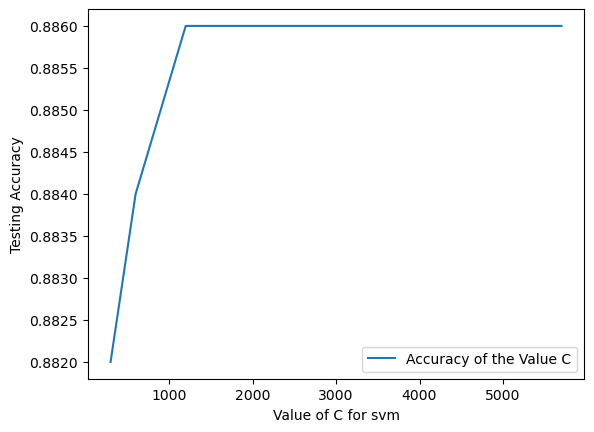

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import datasets, svm, metrics
import time

print('chargement des données')
data_path = 'data/GTSRB/Final_Training/Images/'

nb_classes = 43
rows, cols = 32, 32       #nouvelle taille des images

def load_GTSRB():
    print("Load data...")
    data = []
    labels = []
    for i in range(nb_classes):
        image_path = data_path + '/' + format(i, '05d') + '/'
        print("chargement répertoire", image_path)
        cpt = 0
        for img in glob.glob(image_path + '*.ppm'):
            image = cv2.imread(img)
            image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
            #image = (image / 255.0)                            #rescale
            image = cv2.resize(image, (rows, cols))            #resize
            image = np.array(image, 'f')
            image = image.reshape(rows*cols)                   #data flattening (aplatissement) 
            data.append(image)
            label = int(image_path.split('/')[-2])
            labels.append(label)
            cpt = cpt+1
            if(cpt > 200):
                break
    print('OK')
    return (data, labels)

X, y = load_GTSRB()
print(np.shape(X))
print(np.shape(y))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

C_range= range(300,6000,300)
#accuracy =[]
accuracies=[]
for k in C_range:
    print("C=", k)
    classifier = svm.SVC(C=k, kernel='rbf')
    
    print("Apprentissage...")
    t0 = time.time()
    classifier.fit(X_train, y_train)
    t1 = time.time()
    print("OK")
    print('duree apprentissage : %.1fs' % (t1-t0))

    print("Prediction...")
    t0 = time.time()
    y_pred = classifier.predict(X_test)
    t1 = time.time()
    print('duree prédiction : %.1fs' % (t1-t0))

    print("Calcul taux de reconnaissance...")
    accuracy = accuracy_score(y_test, y_pred)  #calcul precision
    accuracy = round(accuracy, 3)
    accuracies.append(accuracy)
    
print(accuracy)

plt.plot(C_range, accuracies,label='Accuracy of the Value C')
plt.xlabel('Value of C for svm')
plt.ylabel('Testing Accuracy')
#plt.show()
plt.legend()

